# Importing the libraries and the datas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import cufflinks as cf
cf.go_offline()

In [2]:
test = pd.read_csv('../input/titanic/test.csv')
train = pd.read_csv('../input/titanic/train.csv')

# Exploratory Data Analysis

# Missing Data

In [3]:
#more detailed look at what data is missing:
total = train.isnull().sum().sort_values(ascending = False)
percent_1 = train.isnull().sum()/train.isnull().count() * 100
percent_2 = (round(percent_1, 1)).sort_values(ascending = False)
missing_data = pd.concat([total, percent_2], axis = 1, keys=['Total', '%'])
missing_data.head(10)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0
Parch,0,0.0
SibSp,0,0.0
Sex,0,0.0
Name,0,0.0
Pclass,0,0.0


Analysis to see if sex and age correlate with survival rate

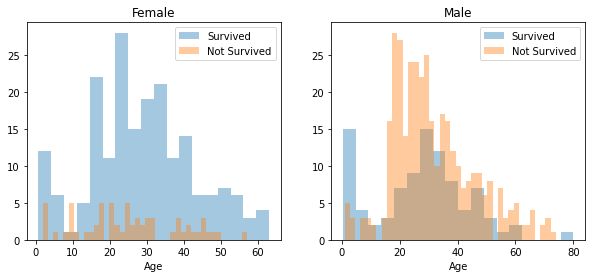

In [4]:
survived = 'Survived'
notsurvived = 'Not Survived'
fig, axes = plt.subplots(1, 2, figsize = (10, 4))
Women = train[train['Sex'] == 'female']
Men = train[train['Sex'] == 'male']
ax = sns.distplot(Women[Women['Survived'] == 1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde = False)
ax = sns.distplot(Women[Women['Survived'] == 0].Age.dropna(), bins=40, label = notsurvived, ax = axes[0], kde = False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(Men[Men['Survived'] == 1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(Men[Men['Survived'] == 0].Age.dropna(), bins=40, label = notsurvived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

It is noteworthy that WOMEN had more have higher rates of **survival**, mainly in the age group between 15 and 40 years. For MEN, the highest rate of **non-survivors** is between 15 and 40 years.

Now we will do the same with the Embarked:

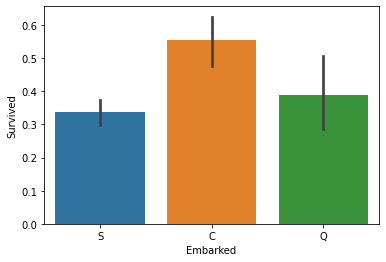

In [5]:
sns.barplot('Embarked', 'Survived', data = train)

Those who got gate C, had higher numbers of survivors. At the S and Q gates less than 50% managed to survive.

Survivors and Pclass:

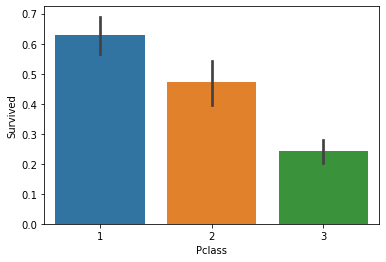

In [6]:
sns.barplot('Pclass', 'Survived', data = train)

For Pclass 3, less than half survived, the rates are very small, but the same cannot be said for Pclass 1, here more than 60% survived.

To improve the visualization, I will create a new attribute called 'Relatives', here I will join SibSP and Parch. We will do an analysis on people who were accompanied or alone:

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.



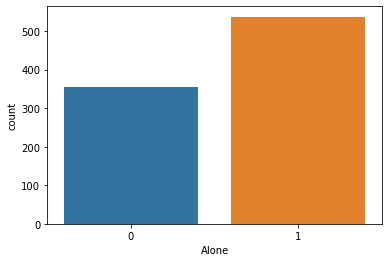

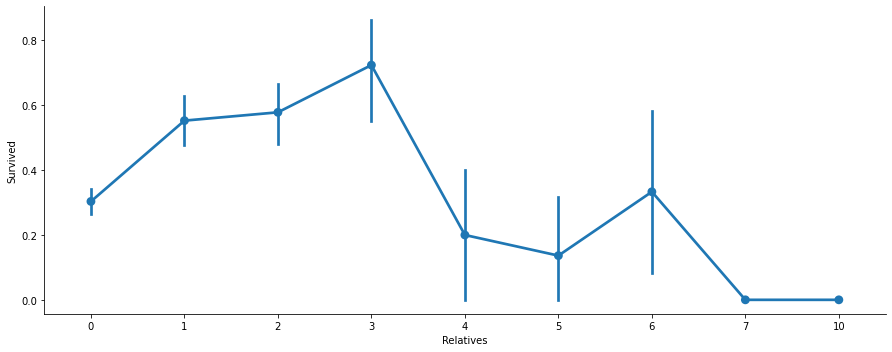

In [7]:
data = [train, test]
for dataset in data:
    dataset['Relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['Relatives'] > 0, 'Alone'] = 0
    dataset.loc[dataset['Relatives'] == 0, 'Alone'] = 1
    dataset['Alone'] = dataset['Alone'].astype(int)
train['Alone'].value_counts()
sns.countplot(x = 'Alone',data = train)
sns.factorplot('Relatives','Survived', data=train, aspect = 2.5, )

We can see that there are more people who were alone and the chances of surviving are greater for those who have up to 3 Relatives.

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.



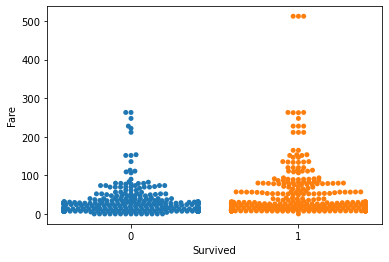

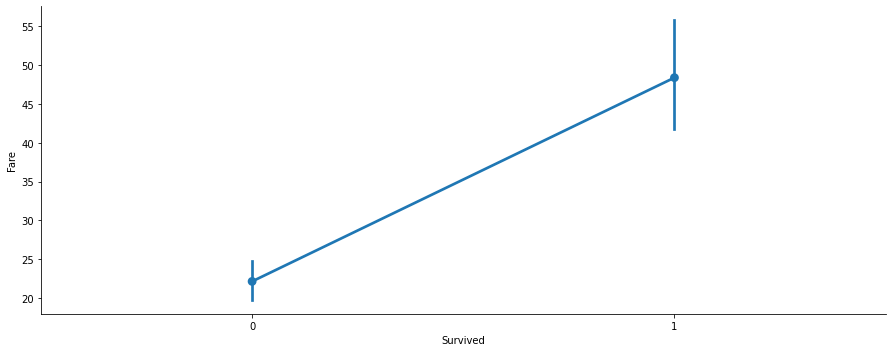

In [8]:
sns.swarmplot(x='Survived',y='Fare', data=train)
sns.factorplot(x = 'Survived',y = 'Fare', data=train, aspect = 2.5, )

We were able to notice that those who paid higher Fare, had higher survival rates. The graph showed that at 500, the difference is even greater

# Data Cleaning

Recalling that the attributes that had the missing data were the Cabin, Embarked and Age. For Age, we will convert the missing to a mean:

In [9]:
data = [train, test]
for dataset in data:
    mean = train["Age"].mean()
    std = test["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train["Age"].astype(int)

train["Age"].isnull().sum()

0

The Cabin column will be removed as there are many missing elements

In [10]:
train.drop('Cabin',axis = 1,inplace = True)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Relatives,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S,0,1


Embarked has few missing elements (2), so it will be filled with a common value:

In [11]:
commonvalue = 'S'
data = [train, test]
for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(commonvalue)
    
train["Embarked"].isnull().sum()

0

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int64  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
 11  Relatives    891 non-null    int64  
 12  Alone        891 non-null    int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 90.6+ KB


# Converting Categorical Features

In [13]:
#Converting 'Sex' to numeric
genders = {"male": 0, "female": 1}
data = [train, test]
for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)  
#Converting Embarked to numeric
ports = {"S": 0, "C": 1, "Q": 2}
data = [train, test]
for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [14]:
train.drop(['Name','Ticket'],axis = 1,inplace = True)

In [15]:
train.head(15)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Relatives,Alone
0,1,0,3,0,22,1,0,7.2500,0,1,0
1,2,1,1,1,38,1,0,71.2833,1,1,0
2,3,1,3,1,26,0,0,7.9250,0,0,1
3,4,1,1,1,35,1,0,53.1000,0,1,0
4,5,0,3,0,35,0,0,8.0500,0,0,1
5,6,0,3,0,24,0,0,8.4583,2,0,1
6,7,0,1,0,54,0,0,51.8625,0,0,1
7,8,0,3,0,2,3,1,21.0750,0,4,0
8,9,1,3,1,27,0,2,11.1333,0,2,0
9,10,1,2,1,14,1,0,30.0708,1,1,0


# Logistic Regression

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(train.drop('Survived',axis = 1), 
                                                    train['Survived'], test_size=0.5, 
                                                    random_state = 42)

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

In [19]:
clf = LogisticRegression()
clf.fit(X_train,Y_train)

pred = clf.predict(X_test)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [20]:
hit_rate = accuracy_score(Y_test, pred)
error_rate = 1 - hit_rate

Check the **performance** of our model. How many rankings did he hit

In [21]:
hit_rate * 100

79.82062780269058

In [22]:
error_rate * 100

20.17937219730942

In [23]:
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       267
           1       0.79      0.68      0.73       179

    accuracy                           0.80       446
   macro avg       0.80      0.78      0.78       446
weighted avg       0.80      0.80      0.80       446



In [24]:
print(confusion_matrix(Y_test,pred))

[[234  33]
 [ 57 122]]


In [25]:
len(pred)

446

In [26]:
len(test)

418

In [27]:
submission = pd.DataFrame({ "PassengerId": X_test['PassengerId'], "Survived": pred})

submission.head()

,PassengerId,Survived
709,710,0
439,440,0
840,841,0
720,721,1
39,40,1


In [28]:
submission.to_csv('MySubmission.csv', index = False)